# Interaktive Präsentationen mit Jupyter Notebook in der Statistiklehre
<!-- use "#" for the presentation's title as above; its author(s) etc. may be specified below -->
<span id="author" hidden>Tobias Bernstein</span>
<span id="title_footnote" hidden>Präsentationen mit JB</span>

<span><u>Tobias Bernstein</u>, Thomas Hotz und Friedrich M. Philipp</span>
<br/><br/>
Fachgebiet für Wahrscheinlichkeitsrechnung und mathematische Statistik <br/>
<span id="institute">Institut für Mathematik<br/> TU Ilmenau</span>

Herbsttagung des AK Stochastik, 26 Oktober 2025

gefördert durch das BMFTR im Rahmen von **THInKI** – Thüringer Hochschulinitiative für KI im Studium

<!-- the footer may be specified within the following div-element with id "myfooter" -->

<div id="myfooter" hidden>
    <div style="padding-left:9em;padding-bottom:0.1em;font-size:2em;">
        <i>stuff</i>
        <!-- if the following logo's src-attribute is an empty string "", it will be filled with the image embedded below, otherwise the specified URI will be used -->
        <img id="mylogo" src="" alt="Logo" height="100px" style="padding-left:27em;;padding-bottom:0.3em">
    </div>
</div>

<!--  -->
<!-- LaTeX-like macros maybe defined with the double dollar-signs below -->
$$
\newcommand{\N}{\mathbb{N}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\C}{\mathbb{C}}
\renewcommand{\P}{\mathbb{P}}
\DeclareMathOperator{\E}{\mathbf{E}}
\DeclareMathOperator{\Var}{\mathbf{Var}}
$$
<!--  -->
<!-- the javascript code in the following span-element creates the footer and loads the following css styles -->
<!-- change by Tobias: now replaces author automatically -->
<span id="myfooterjs" hidden>
    const authorName = document.getElementById('author').textContent;
    const footerTitle = document.getElementById('title_footnote').textContent;
    const combined = footerTitle + ", " + authorName
    const footerName = document.querySelector('#myfooter i');
    footerName.textContent = combined;    
    document.styleSheets[0].insertRule(document.getElementById("mycss").innerHTML,1); // set CSS
    document.getElementById("footer").innerHTML = document.getElementById("myfooter").innerHTML;
    if (document.getElementById("footer").getElementsByTagName("img")[0].getAttribute("src") == "") {
        document.getElementById("footer").getElementsByTagName("img")[0].setAttribute("src", document.getElementById("thelogo").getAttribute("class"));
    }   
</span>
<!--  -->
<!-- the css within the following span-element is used to style the presentation -->
<span id="mycss" hidden>@media all {
    .reveal .progress {
        height: 10px; /* thick progress bar */
        background-color: #00646a40; /* color of non-progressed part of progress bar */
    }
    .rise-enabled .reveal .progress span {
        background: #00646a; /* color of progressed part of progress bar */
    }
    .rendered_html strong {
        color: #ff7900; /* tui-orange for emphasis */
    }
    div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
        background: #00646a; /* tui-green for left bar of selected cell */
    }
    div.input_prompt {
        color: #003359; /* tui-blue for input prompt */
    }
    div.output_prompt {
        color: #ff7900; /* tui-orange for output prompt */
    }
    #rise-footer {
        color: #003359; /* tui-blue for footer */
    }
    .rendered_html h1 {
        color: #003359; /* tui-blue for talk title */
    }
    .rendered_html h2 {
        color: #003359; /* tui-blue for slide title */
    }
    div.text_cell_render {
        color: #003359; /* tui-blue for slide text */
    }
    #author {
        color: #ff7900; /* tui-orange for author on title-page */
    }
    #institute {
        color: #00646a; /* tui-green for institute */
    }
    .reveal .controls button {
        color: #003359; /* tui-blue for arrow button */
    }
    div.notvisible {
        display: none;
    }
    /* style code using https://codemirror.net/ */
    span.cm-atom { color: #00646a !important; }
    span.cm-builtin { color: #00646a !important; }
    span.cm-comment { color: #606060 !important; }
    span.cm-error { background-color: #ff7900 !important; }
    span.cm-keyword { color: #00646a !important; }
    span.cm-link { color: #606060 !important; }
    span.cm-meta { color: #ff7900 !important; }
    span.cm-number { color: #ff7900 !important; }
    span.cm-operator { color: #00646a !important; }
    span.cm-qualifier { color: #ff7900 !important; }
    span.cm-variable { color: #003359c0 !important; }
    span.cm-variable-2 { color: #003359 !important; }
    span.cm-string { color: #003359 !important; }
}</span>
<!--  -->
<!-- to use an embedded logo, embed an image in an empty markdown block, copy its "image adress" (HTML src-attribute), and enter it as the following span's class-attribute -->
<span id="thelogo" hidden></span>

In [1]:
import numpy as np # numerics
import scipy.stats as st # probability
import matplotlib.pyplot as plt # plots
import matplotlib as mpl # more plots
import pandas as pd # data handling
import statsmodels.api as sm # statistics
import statsmodels.formula.api as smf # statistical models
import ipywidgets as widgets # interactive
from IPython.display import display
from IPython.display import clear_output
import os.path # files

mpl.rcParams['figure.dpi'] = 150

def hide():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("notvisible")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)

from html.parser import HTMLParser
class NBParser(HTMLParser):
    def handle_starttag(self, tag, attrs):
        self.attr = {attr[0] : attr[1] for attr in attrs}

p = NBParser()
p.feed('<rise slide="fragment"/>')
p.attr['slide']

## Welches Problem lösen Jupyter Notebooks?

**Verwendung unterschiedlicher Werkzeuge für ...**
- theoretische Abschnitte in Skript/Präsentation
- praktische Beispiele in den Lehrveranstaltungen
- Übungen

**Notebooks können Text- und Codebestandteile enthalten;** <br/>
**erlauben Lehre aus einem Guss!**
<br/><br/>
**attraktive Darstellung im Präsentationsmodus RISE**

> **Satz (Gesetz der großen Zahlen im quadratischen Mittel):** Seien $X_1, \dots, X_n \in \mathcal{L}^2(\Omega, \mathbf{P})$ unabhängig und identisch verteilte, quadratsummierbare Zufallsvariablen mit Erwartungswert $\mu = \mathbf{E} X_1 \in \mathbb{R}$ und Varianz $\sigma^2 = \mathbf{Var} X_1 \in [0, \infty)$. Dann gelten
>
> $$ \textstyle \mathbf{E} \bar X_n = \mu \qquad\text{und}\qquad \mathbf{Var} \bar X_n = \frac{\sigma^2}n, $$
>
> und damit
>
> $$ \Vert \bar X_n - \mu \Vert_2 = \sqrt{\mathbf{Var} \bar X_n} = \tfrac{\sigma}{\sqrt n}. $$
>
> **$ \bar X_n $** konvergiert also im quadratischen Mittel gegen $ \mu $.

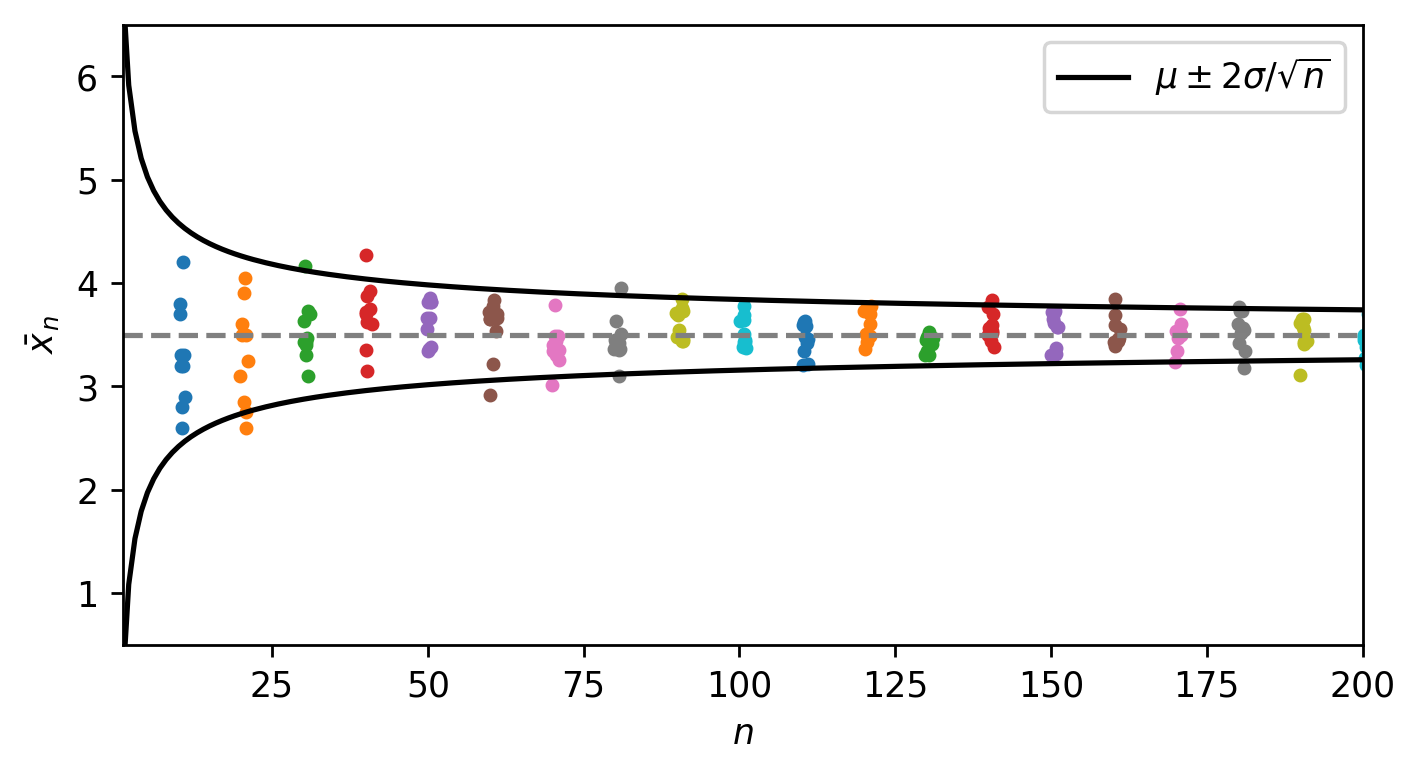

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl # more plots
import scipy.stats as st

mpl.rcParams['figure.dpi'] = 250

w_mean = st.randint(1, 7).mean()
w_std = st.randint(1, 7).std()
n = pd.Series(range(1, 21)) * 10
r = 10
x = n.apply(lambda ni: pd.Series(st.randint.rvs(1, 7, size=r * ni).reshape(r, ni).mean(1)))
ax = plt.subplot(box_aspect=1/2)
ax.plot()
ax.axhline(w_mean, c='gray', ls='--')
for ni, hi in zip(n, x.values):
    ax.scatter(st.uniform.rvs(ni-0.15, 1.3, size=r), hi, marker='.')
ax.set_xlabel('$n$')
ax.set_ylabel('$\\bar x_n$')
ns = np.arange(1, np.max(n)+1)
ax.plot(ns, w_mean + 2 * w_std / np.sqrt(ns), 'k-', label=r'$\mu\pm 2 \sigma/\sqrt{n}$')
ax.plot(ns, w_mean - 2 * w_std / np.sqrt(ns), 'k-')
ax.set_xbound(1, np.max(n))
ax.set_ybound(0.5, 6.5)
ax.legend(loc='upper right')

mpl.rcParams['figure.dpi'] = 150
hide()

### Unsere Motivation

- integrierte Lehrinfrastruktur für Lehrende und Studierende
- interaktive Präsentationen in Vorlesungen
- organisches Bereitstellen von Übungen
- Förderung durch Bundesministerium für Forschung, Technologie und Raumfahrt (bzw. BMBF) im Rahmen des THInKI-Projekts
![THInKI_Logo.png](THInKI_Logo.png)

## Was sind Jupyter Notebooks?

- interaktive Computing-Plattform
- JSON-Quelldatei: komfortable Bearabeitung im Browser/Programmierumgebung
- enthält u. a. die **Zellen**
    - Textzellen mit Markdown
    - Codezellen mit ausführbarem Code
- Bearbeitung live möglichhh → interaktiv 
- gehostet auf einem **Notebook-Server** (lokal oder online)
- Zugriff über Browser 
- Erweiterung für Präsentationen = **RISE (Reveal.js - Jupyter/IPython Slideshow Extension)**
- Installation: https://jupyter.org/install und https://rise.readthedocs.io/en/latest/installation.html

### Text-Zellen

basieren auf **Markdown** = reiner Text + einfache „Markierungen“

- `*kursiv*` ergibt *kursiv* 
- `**fett**` ergibt **fett**
- `***fett und kursiv***` ergibt ***fett und kursiv***
- `~durchgestrichen~` ergibt ~durchgestrichen~
- &#96;Code&#96; für `Code`
- Listen: `- ` am Zeilenanfang, für Hierarchie einrücken
- Aufzählungen: `1. ` am Zeilenanfang, z. B.
    1. erstens
    1. zweitens
    2. drittens (Nummerierung irrelevant, am einfachsten immer `1.`)
<br/><br/>
- `[Link auf ein Cheatsheet](https://www.markdownguide.org/cheat-sheet/)` ergibt [Link auf ein Cheatsheet](https://www.markdownguide.org/cheat-sheet/)
- **Überschriften** verschiedener Stufe: `#` bis `######`; `##` geignet für **Folientitel**
- um Zeichen mit besonderer Bedeutung zu erhalten, ggf. `\` voranstellen, also `\*` für \*

### Fortgeschrittenes Markdown
<br/>

- **mathematische Formeln** wie in `LaTeX`:
    1. in der Zeile mit `$a^2 + b^2 = c^2$`, z. B. **$a^2 + b^2 = c^2$**
    1. abgesetzt mit `$$ e^{\imath x} = \cos x + \imath \sin x $$`
        
        **$$ e^{\imath x} = \cos x + \imath \sin x $$**
        
        beachte: Hervorherbungen mit `**` nur für gesamte Formel
    1. Definition von `LaTeX-Makros` in `$$...$$` möglich (siehe Beginn des Dokuments)
        
- `> ` am Zeilenanfang für herausgehobene Blöcke (Zitate, Definitionen etc.)

> **Zitat:**
>
> $\quad$ Statistics state the state of the state.
> 
> Anonym.

- Bilder
    - als Dateipfad: `![THInKI_Logo.png](attachment:THInKI_Logo.png)` ![THInKI_Logo.png](THInKI_Logo.png)
    - als Anhang der Zelle (einfügen per Drag and Drop); wird in der Notebook-Datei gespeichert `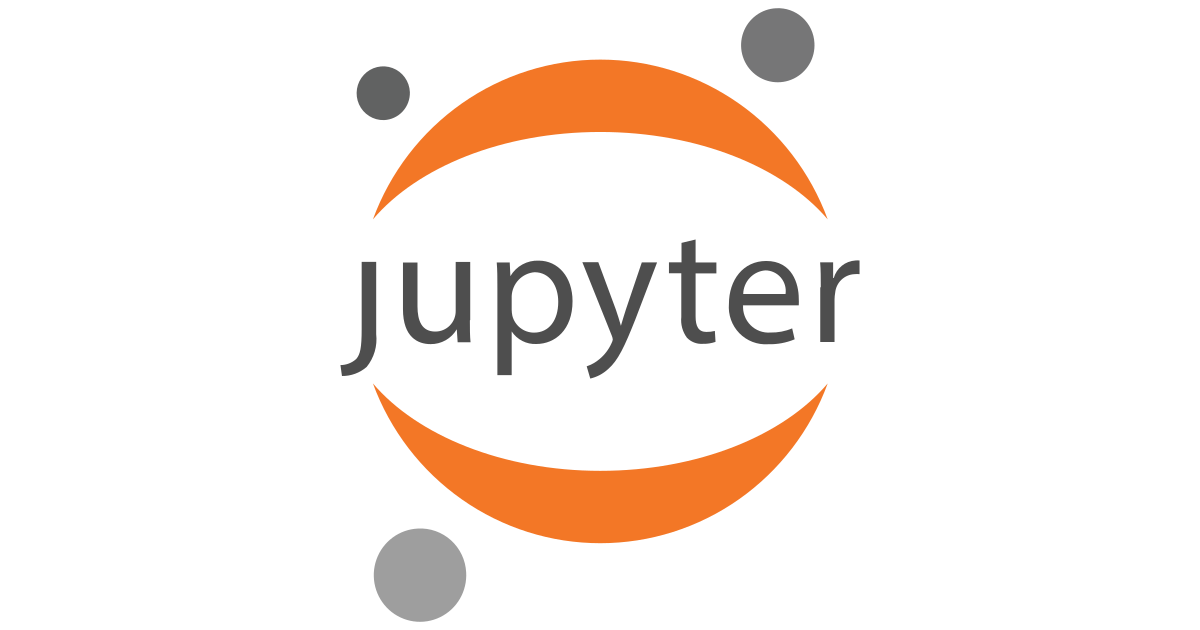` 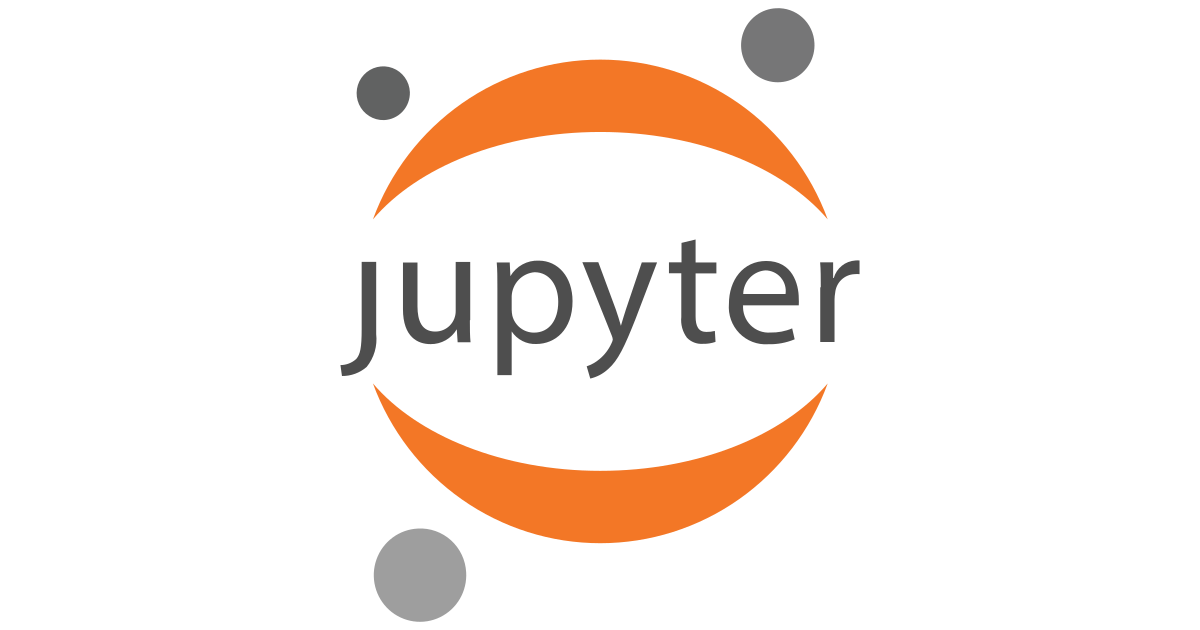   
    - als Link: `![TUI](https://www.tu-ilmenau.de/fileadmin/_processed_/b/7/csm_Galerie_01__c__Hajo_Dietz_f0b1838c01.jpg)` ![TUI](https://www.tu-ilmenau.de/fileadmin/_processed_/b/7/csm_Galerie_01__c__Hajo_Dietz_f0b1838c01.jpg)


- **Tabellen**:
    ```
    | Spalte 1 | Spalte 2 |
    | :- | :- |
    | Zelle 1,1 | Zelle 1,2 |
    | Zelle 2,1 | Zelle 2,2 |
    ```
    | Spalte 1 | Spalte 2 |
    | :- | :- |
    | Zelle 1,1 | Zelle 1,2 |
    | Zelle 2,1 | Zelle 2,2 |
- horizontale **Trennlinie** `---`
---
- HTML möglich, insbesondere
    - `<br/>` für **Zeilenumbruch** beispielsweise zwischen Überschrift und direkt folgender Liste
    - `&#128640;` für **Unicode** &#128640;, insbesondere `&nbsp;` für **Leerzeichen**
- beachte: nicht alle Features verschiedener **Markdown-Varianten** funktionieren in jupyter notebooks

## Eigene Designs und Fußzeile

- eigene (Corporate-)Designs mittels CSS
- z. B. Farben, Code-Highlighting oder Schriftarten
- Fußzeile (mit Logo) editierbar
- andere Varianten möglich

## Tastatur-Kürzel für Jupyter Notebooks
<br/>

| Modus | Taste(nkombination) | Wirkung |
| :- | :- | :- |
| Navigationsmodus | `M` | Zelle wird **Markdown-Zelle** |
| Navigationsmodus | `Y` | Zelle wird **Code-Zelle** |
| Navigationsmodus | `Enter` | Zelle **bearbeiten** |
| Bearbeitungsmodus | `Esc` | Bearbeitungsmodus **verlassen** |
| Bearbeitungsmodus | `Strg+Enter` | Zelle **ausführen** |
| Bearbeitungsmodus | `Shift+Enter` | Zelle **ausführen** und **nächste Zelle auswählen** |
| Bearbeitungsmodus | `Alt+Enter` | Zelle **ausführen** und **darunter neue Zelle bearbeiten** |
| Navigationsmodus | `A` | **darüber neue** Zelle |
| Navigationsmodus | `B` | **darunter neue** Zelle |
| Navigationsmodus | `X` | Zelle **ausschneiden** (und löschen) |
| Navigationsmodus | `C` | Zelle **kopieren** |
| Navigationsmodus | `V` | Zelle **darunter einfügen** |

siehe auch im Menü *Help → Keyboard Shortcuts* oder Taste `H` im Navigationsmodus

## Präsentationen mit RISE

- **[Erweiterung](https://rise.readthedocs.io/en/latest/index.html)** für jupyter notebook server (bis **Version 6**)
- ermöglicht Anzeige als **Präsentation**
- „überlange“ Folien erhalten eine **Scrollbar**
- Folienübersicht vefügbar
- Markierungen
- Möglichkeiten zum Aufdecken von Slides

- verschiedene Slide Types, z. B. Slide, Sub-Slide, Fragment, Skip
- Editierung außerhalb des Präsentationsmodus

- Tastatur-Kürzel:

| Modus | Taste(nkombination) | Wirkung |
| :- | :- | :- |
| Navigationsmodus | `Alt+R` | Präsentation mit aktueller Zelle **starten** |
| Präsentationsmodus | `Alt+R` | Präsentation **beenden** |
| Navigationsmodus | `Shift+I` | Zelle als **neue Folie** markieren |
| Navigationsmodus | `Shift+G` | Zelle als **neuen Folienteil** markieren |
| Navigationsmodus | `Shift+K` | Zelle zum **Überspringen** markieren |
| Präsentationsmodus | `Space` / `PgDwn` | **nächste Folie** |
| Präsentationsmodus | `Shift+Space` / `PgUp` | **vorige Folie** |
| Präsentationsmodus | `W` | **Folienübersicht ein-/ausschalten** |
| Präsentationsmodus | `Shift+A` | **Malmodus** |
| Präsentationsmodus | `S` | **Farbwahl im Malmodus** |
| Präsentationsmodus | `-` | **Gemaltes löschen** |
| Präsentationsmodus | `T` | **Sprechermodus** aktivieren |

Diese Folie ist nicht im Präsentationsmodus zu sehen.

## Code-Zellen

- bestehen aus 3 Teilen
    - **Prompt** nummeriert die Ausführung durch (**Reihenfolge** bei Abhängigkeiten!)
    - **Input** (Code)
    - **Output**
- ggf. *Kernel → Restart & Run All* zum Neustart und erneuter Ausführen in vorgesehener Reihenfolge

In [8]:
x = 4

In [6]:
x += 5

In [9]:
# Ergebnis hängt von Ausführung der vorhergehenden Zellen ab.
print(x)

4


- Import von Paketen und Bibliotheken möglich
- einfachster Fall: gewöhnlicher Code mit Ausgabe

In [32]:
import numpy as np
np.random.randint(6) + 1 # einmal würfeln

5

- auch Plots als Ausgabe möglich:

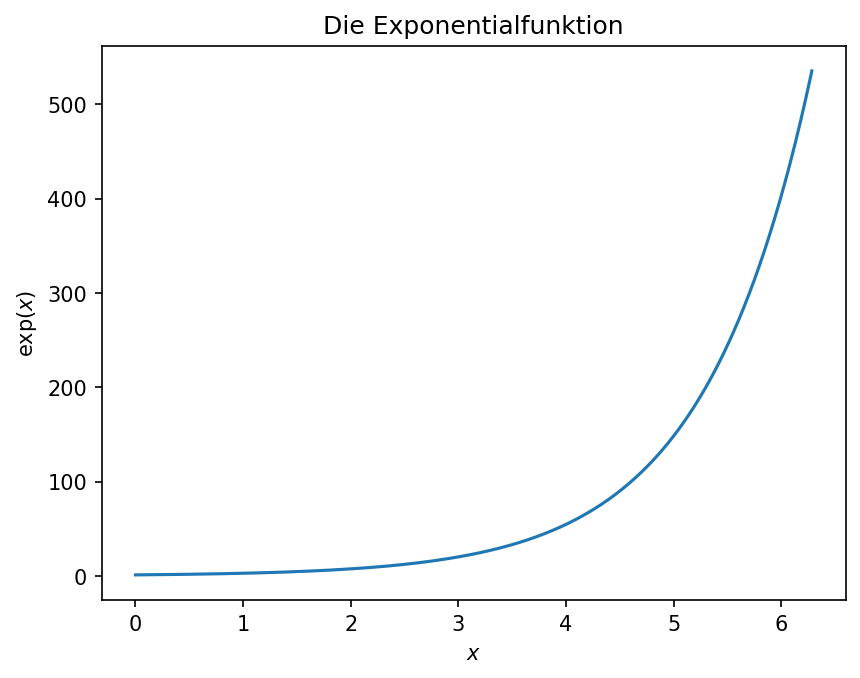

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 400)
fig, ax = plt.subplots(dpi=150)
ax.plot(x, np.exp(x))
ax.set_xlabel("$x$")
ax.set_ylabel("$\exp(x)$")
ax.set_title("Die Exponentialfunktion");

- Pandas gibt `DataFrame` als Tabelle aus:

In [34]:
import pandas as pd

btw = pd.DataFrame({
    'CDU und CSU': pd.Series([28.6, 24.2], index=['2025', '2021']),
    'AfD': pd.Series([20.8, 10.4], index=['2025', '2021']),
    'SPD': pd.Series([16.4, 25.7], index=['2025', '2021']),
    'GRÜNE': pd.Series([11.6, 14.7], index=['2025', '2021']),
    'Die Linke': pd.Series([8.8, 4.9], index=['2025', '2021']),
    'Sonstige': pd.Series([13.9, 8.7], index=['2025', '2021'])
})
btw

,CDU und CSU,AfD,SPD,GRÜNE,Die Linke,Sonstige
2025,28.6,20.8,16.4,11.6,8.8,13.9
2021,24.2,10.4,25.7,14.7,4.9,8.7


- Prompt / Input / Output kann mit Erweiterung [Hide_code](https://github.com/kirbs-/hide_code) **versteckt** (`W` / `E` / `R` und mit `Shift+` wieder angezeigt) werden
- ggf. `None` als letzten Befehl, um Anzeige des Rückgabewerts zu verhindern

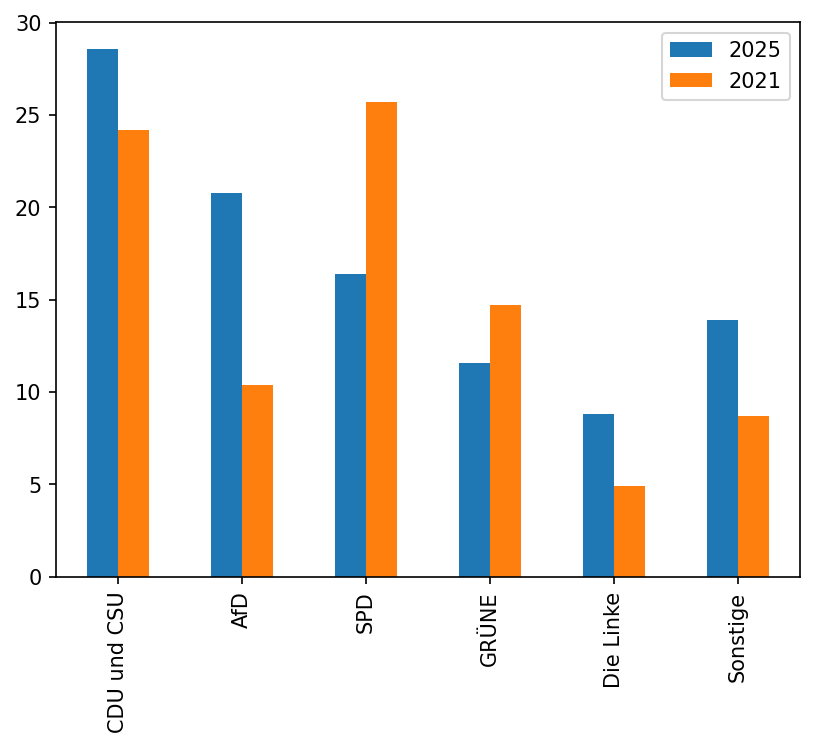

In [35]:
btw.fillna(0).T.plot(kind='bar')
None

## Alternative Kernel

- auch für **andere Programmiersprachen** stehen Kernel zur Verfügung
- beispielsweise [IRkernel](https://irkernel.github.io/) für **R**

## Interaktive Widgets

- `python`-Paket [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- ermöglicht Erstellung von **„Applets“** mit Ein-/Ausgabefeldern, Slidern, Buttons etc.
- laufen **in einer Zelle**, genauer deren Output (kein Wechsel zwischen Zellen möglich)
- **vorher** ausführen (z.B. mittels Extension als `initialization cell` markieren) für Größe der Folie **und live neustarten**
- Prompt und Code ausblenden (s.o.)

### Beispiel: Wahrscheinlichkeitsfunktion der **Binomialverteilung**

In [36]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output

n_slider = widgets.IntSlider(min=1, max=20, step = 1, value=7, description='$n$', layout=widgets.Layout(width='50%'))
p_slider = widgets.FloatSlider(min=0, max=1, step=0.05, value=0.65, description='$p$', layout=widgets.Layout(width='50%'))
out = widgets.Output()

def plot_pmf(n, p):
    ks = np.arange(n + 1)
    with out:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        ax.stem(ks, st.binom(n, p).pmf(ks), basefmt='k', markerfmt='.')
        ax.set_xlabel('$k$')
        ax.set_ylabel('Wahrscheinlichkeitsfunktion $f(k)$')
        plt.show()

def handle(change):
    plot_pmf(n_slider.value, p_slider.value) 
    
n_slider.observe(handle, names='value')
p_slider.observe(handle, names='value')

handle(None)
widgets.VBox(children=[n_slider, p_slider, out])

### Beispiel für ein komplexeres Widget: **Wählermodell**

In [37]:
import time
import threading
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
import matplotlib.colors as col
import matplotlib.colors as col
from IPython.display import display, clear_output

button_layout = widgets.Layout(width='200px', height='40px') # Set a specific width and height

L = 4

# Startzustand
t = 0
X = ( np.arange(L).reshape(L, 1) + np.arange(L).reshape(1, L) ) % 2
I = None
N = None
t_max = 1000
M = np.full(t_max + 1, np.nan)
M[0] = np.sum(X == 1)

# This Output widget will hold the grid or any visuals
out = widgets.Output()

with out:
    fig, ax = plt.subplots()
    ax.imshow(X, origin='lower', 
              cmap=col.ListedColormap(["black", "white", "red"]),
              vmin=0, vmax=2)
    ax.set_title(f'$t = {t}$')
    ax.set_xticks(range(L))
    ax.set_yticks(range(L))
    plt.show()

# Dummy step function (replace with your actual grid update)
def step_func():
    global t, X, I, N, fig, ax
    
    if I is None:
        I = st.randint.rvs(0, L, size=2)
        X[I[0], I[1]] = 2
    elif N is None:
        N = I.copy()
        dim = st.randint.rvs(0, 2)
        N[dim] = ( I[dim] + 2 * st.randint.rvs(0, 2) - 1 ) % L
    else:
        X[I[0], I[1]] = X[N[0], N[1]]
        I = None
        N = None
        t += 1
        M[t] = np.sum(X == 1)
    
    with out:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        ax.imshow(X, origin='lower',
                  cmap=col.ListedColormap(["black", "white", "red"]),
                  vmin=0, vmax=2)
        ax.set_title(f'$t = {t}$')
        ax.set_xticks(range(L))
        ax.set_yticks(range(L))
        if not N is None:
            ax.add_patch(plt.Rectangle(np.flip(N) - 0.5, 1, 1,
                                       color='red', fill=False, linewidth=3))
        plt.show()

# Buttons
play_button = widgets.Button(description="▶ Play", button_style='success', layout=button_layout)
pause_button = widgets.Button(description="⏸ Pause", button_style='warning', layout=button_layout)

# Animation control flag
is_running = False
animation_thread = None

def run_animation():
    global is_running
    while is_running:
        step_func()
        time.sleep(0.5)  # 0.5 second interval

def on_play_clicked(b):
    global is_running, animation_thread
    if not is_running:
        is_running = True
        animation_thread = threading.Thread(target=run_animation, daemon=True)
        animation_thread.start()

def on_pause_clicked(b):
    global is_running
    is_running = False

play_button.on_click(on_play_clicked)
pause_button.on_click(on_pause_clicked)

# Display everything
display(widgets.HBox([play_button, pause_button]))
display(out)

Output()

## jupy_rise_toolkit

- Entwicklung im Rahmen des THInKI-Projekts
- entscheidende Beiträge und Ideen von Thomas Hotz, Stefan Heyder und Matthias Glock
- verfügbar unter https://github.com/Stochastik-TU-Ilmenau/jupy_rise_toolkit
- wesentliche Funktionen vorhanden
- Tests und vollständige Readme-Datei bis Ende November

### hide-Funktion

In [ ]:
import time
import threading
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
import matplotlib.colors as col
# from RISEmagic import hide
import matplotlib.colors as col
from IPython.display import display, clear_output

hide()

button_layout = widgets.Layout(width='200px', height='40px') # Set a specific width and height

L = 4

# Startzustand
t = 0
X = ( np.arange(L).reshape(L, 1) + np.arange(L).reshape(1, L) ) % 2
I = None
N = None
t_max = 1000
M = np.full(t_max + 1, np.nan)
M[0] = np.sum(X == 1)

# This Output widget will hold the grid or any visuals
out = widgets.Output()

with out:
    fig, ax = plt.subplots()
    ax.imshow(X, origin='lower', 
              cmap=col.ListedColormap(["black", "white", "red"]),
              vmin=0, vmax=2)
    ax.set_title(f'$t = {t}$')
    ax.set_xticks(range(L))
    ax.set_yticks(range(L))
    plt.show()

# Dummy step function (replace with your actual grid update)
def step_func():
    global t, X, I, N, fig, ax
    
    if I is None:
        I = st.randint.rvs(0, L, size=2)
        X[I[0], I[1]] = 2
    elif N is None:
        N = I.copy()
        dim = st.randint.rvs(0, 2)
        N[dim] = ( I[dim] + 2 * st.randint.rvs(0, 2) - 1 ) % L
    else:
        X[I[0], I[1]] = X[N[0], N[1]]
        I = None
        N = None
        t += 1
        M[t] = np.sum(X == 1)
    
    with out:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        ax.imshow(X, origin='lower',
                  cmap=col.ListedColormap(["black", "white", "red"]),
                  vmin=0, vmax=2)
        ax.set_title(f'$t = {t}$')
        ax.set_xticks(range(L))
        ax.set_yticks(range(L))
        if not N is None:
            ax.add_patch(plt.Rectangle(np.flip(N) - 0.5, 1, 1,
                                       color='red', fill=False, linewidth=3))
        plt.show()

# Buttons
play_button = widgets.Button(description="▶ Play", button_style='success', layout=button_layout)
pause_button = widgets.Button(description="⏸ Pause", button_style='warning', layout=button_layout)

# Animation control flag
is_running = False
animation_thread = None

def run_animation():
    global is_running
    while is_running:
        step_func()
        time.sleep(0.5)  # 0.5 second interval

def on_play_clicked(b):
    global is_running, animation_thread
    if not is_running:
        is_running = True
        animation_thread = threading.Thread(target=run_animation, daemon=True)
        animation_thread.start()

def on_pause_clicked(b):
    global is_running
    is_running = False

play_button.on_click(on_play_clicked)
pause_button.on_click(on_pause_clicked)

# Display everything
display(widgets.HBox([play_button, pause_button]))
display(out)

Output()

### PDF-Erzeugung

- Umwandlung der Notebooks in statisches Skript von Studierenden gewünscht
- automatisiertes Skript zur Umwandlung Notebook → HTML → PDF
- u. a. mit Inhaltsverzeichnis
- Seitenumbrüche können manuell hinzugefügt werden

### Templates

In [39]:
import os
import sys
import nbformat

def create_template(
        author: str = 'Author',
        title: str = 'Titel',
        date: str = None, 
        path: str = None,
        filename: str = 'my_notebook' ):
    
    # default behavoir: use path of script that is calling the function
    if path == None:
          
        path = os.path.abspath('')
    
    # create new notebook
    nb = nbformat.v4.new_notebook() 

    # add tilte 
    cell_title = nbformat.v4.new_markdown_cell( '# ' + title )
    nb['cells'].append( cell_title )

    # add packages
    cell_packages = nbformat.v4.new_code_cell( 'import numpy as np' )
    nb['cells'].append( cell_packages )

    # add metadata TODO

    nb['metadata'].update({
        "rise": {
            "enable_chalkboard": True,
            "footer": "<div style=\"padding-left:6em;padding-bottom:0.1em;font-size:3em;\">" + 
                        author + ": &nbsp; <i>" + title + "</i><img src=\"TU_Logo_SVG_crop.svg\" alt=\"TU Ilmenau\" height=\"120%\" style=\"padding-left:9em;;padding-bottom:0.3em\"></div>",
            "history": False,
            "progress": True,
            "reveal_shortcuts": {
                "chalkboard": {
                    "download": "d",
                    "toggleChalkboard": "shift-b",
                    "toggleNotesCanvas": "shift-a"
                }
            },
            "scroll": True
        }
    })

    # write to file
    cd = os.getcwd()

    with open( path + '\\' + filename + '.ipynb', 'w' ) as f:
	    nbformat.write(nb, f)

In [40]:
if True:
    create_template( author = 'Tobias Bernstein', title = 'Mein erstes Jupyter Notebook', filename = 'from_nb' )

### Live-Umfragen

- Vorbereiten von Umfrage und Ergebnis-Datei auf geeigneter Cloud (z. B. TU-Cloud oder Google Drive)
- Erstellen eines QR-Codes zum Zugriff auf Umfrage
- automatisches Auslesen der Ergebnisdatei
- Präsentation muss nicht verlassen werden!

In [41]:
import qrcode
import requests
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from io import StringIO

def show_QR_code( data: str, size: int = 10 ) -> None:

    # Generate QR code
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=size,
        border=4,
    )
    qr.add_data(data)
    qr.make(fit=True)

    # Create and show image
    img = qr.make_image(fill="black", back_color="white")
    display(img)
    # imgplot = plt.imshow(img)
    # plt.show()
    return None

def get_csv_from_cloud( url: str ) -> pd.DataFrame:

    # add /download
    url_answers = url + "/download"

    # press "Ergebnisse -> ... -> Tabellendokument neu exportieren"
    response = requests.get( url_answers )

    if response.status_code == 200:
        # Read CSV into pandas DataFrame
        csv_data = StringIO( response.content.decode( 'utf-8' ) )
        df = pd.read_csv( csv_data )
        return df
    else:
        print( "Failed to download CSV: ", response.status_code )
        return None

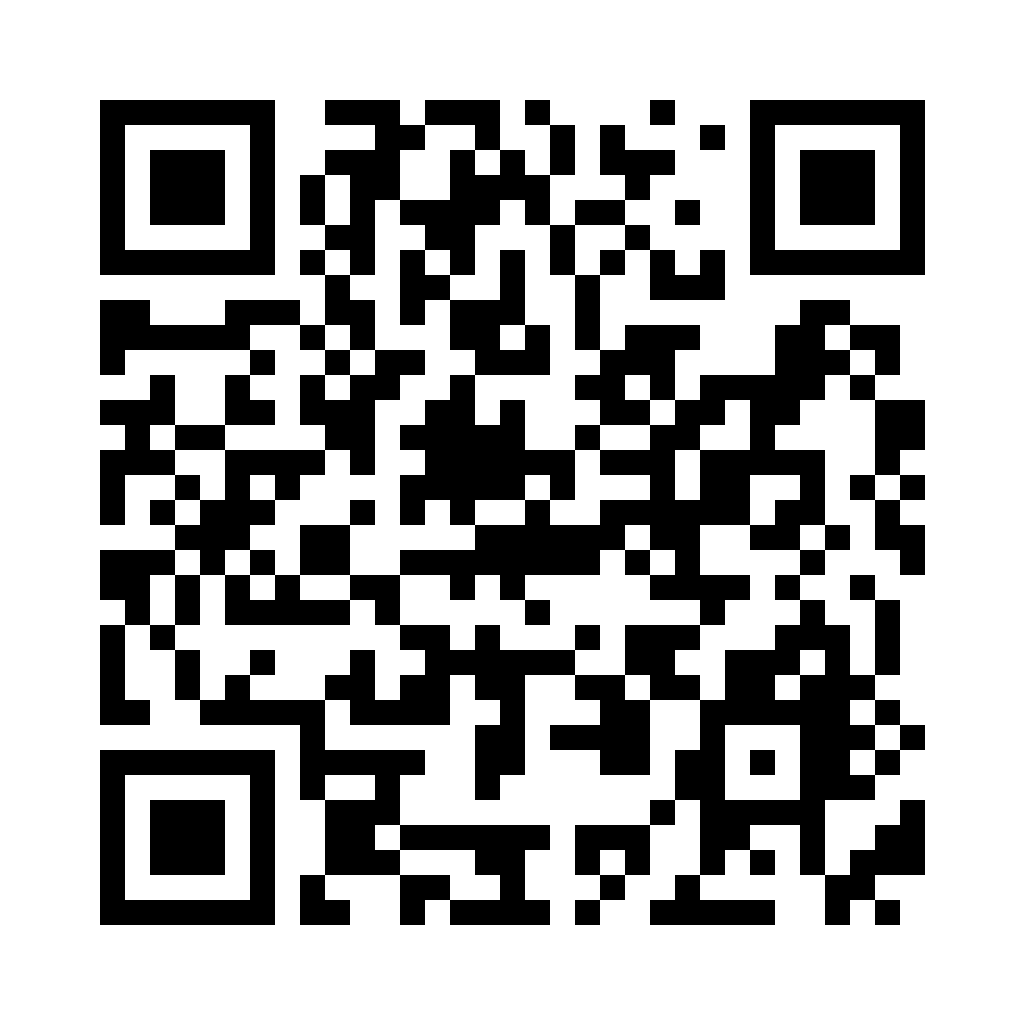

In [42]:
show_QR_code("https://github.com/Stochastik-TU-Ilmenau/jupy_rise_toolkit", 25)

In [43]:
url = "https://cloud.tu-ilmenau.de/s/YxQDbxXJxiWWHBS"
df = get_csv_from_cloud( url )
df.head()

,Meldedatum,NeuerFall,AnzahlFall,AnzahlTodesfall,AnzahlGenesen
0,2020-10-01,0,2929,26,2903
1,2020-10-02,0,2929,25,2904
2,2020-10-03,0,2196,12,2184
3,2020-10-04,0,1156,9,1147
4,2020-10-05,0,2415,35,2380


## Nutzen für die eigene Lehre

- Lehrende ...
    - nutzen **lokale Installation**
    - halten **Präsentation**
    - mit speziellem **mouse pointer**
    - mit (drahtloser) **Minitastatur**
    - **entwickeln (ohne RISE)** ggf. in Programmierumgebung (z.B. VSCode)


- Studierende ...
    - nutzen (ohne Installation) **[JupyterHub](https://jup.rz.tu-ilmenau.de/)** des Rechenzentrums (im Intranet/VPN) für notebook **ohne RISE**
    - benötigen nur einen **Browser** (plattform-/hardware-unabhängig)
    - können verborgene **Zusatzinhalte** zu Hause anschauen
    - verwenden **Code-Beispiele** aus notebook für **Übungen**
    - erhalten **PDF** für Notizen während der Vorlesung

## Vorteile

- für Lehrende **leicht** zu erlernen und zu bedienen
- nur **eine** Quelldatei
- geringer Aufwand für Erstellen und Pflege der Inhalte
- Code kann **live** ausgeführt und verändert werden
- **interaktive** Elemente
- **live erhobene Daten** auswerten
- Präsentation und Code **in einer Umgebung / Datei**
- **open source** verfügbar für `python` und `R`
- **Zusatzinhalte** (heterogene Zielgruppen!) können eingefügt, aber nicht angezeigt werden

## Nachteile

- gewisse **Instabilität**, ggf. Präsentation von Folie davor neu starten
- aktuell **Umbruch**: zukünftig nur für **JupyterLab** verfügbar
- **Ästhetik** des Skripts leidet
- eingeschränkte **Flexibilität** der Präsentation

**Vorteile überwiegen!**

# Vielen Dank für Ihre Aufmerksamkeit!

# **<i>Fragen?</i>**

<br/>
<br/>

Mit freundlicher Unterstützung von <br/> ![THInKI_Logo.png](THInKI_Logo.png)